## Lab: Linear regression, part 2
In this lab we will continue to perform linear regression using the CPU data set.


1. Read the CPU data:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2) # clock speed in MHz 

2. Create NumPy arrays X and y from the data.
- The target variable y should come from column 'prp' of df.  For X, choose two other columns of df.  


In [48]:
X = np.array(df[['erp', 'cs']].values)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
y = np.array(df['prp'].values)

In [49]:
df

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48
...,...,...,...,...,...,...,...,...,...
sperry 80/8,124,1000,8000,0,1,8,42,37,8.06
sperry 90/80-model-3,98,1000,8000,32,2,8,46,50,10.20
sratus 32,125,2000,8000,0,2,14,52,41,8.00
wang vs-100,480,512,8000,32,0,0,67,47,2.08


3. Create training and test sets using train_test_split().  Use Scikit-Learn's LinearRegression 
class to create a linear model from X_train and y_train.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
rgr = LinearRegression()
rgr.fit(X_train, y_train)



LinearRegression()

4. What are the coefficients of your model?


In [51]:
print('erp: {}'.format(rgr.coef_[0]))
print('cs : {}'.format(rgr.coef_[1]))

erp: 1.0205596020215797
cs : 0.42216611401492443


5. Are both the predictor variables of your model important in predicting ‘prp’?
- Both value are contributing but erp is contributing a lot more than cs

6. What is the R-squared value for your model?  (Use X_train and y_train to get the R-squared 
value.)  Did you get a good R-squared value?  What's the best possible R-squared value?


In [52]:
r2 = rgr.score(X_train, y_train)
print('R-square: {:.2f}'.format(r2))

R-square: 0.91


R-squared value of 0.91 is pretty good. Perfect is 1

7. Produce a scatterplot in which the predicted prp values are shown on the x axis and the actual 
prp values are shown on the y axis.


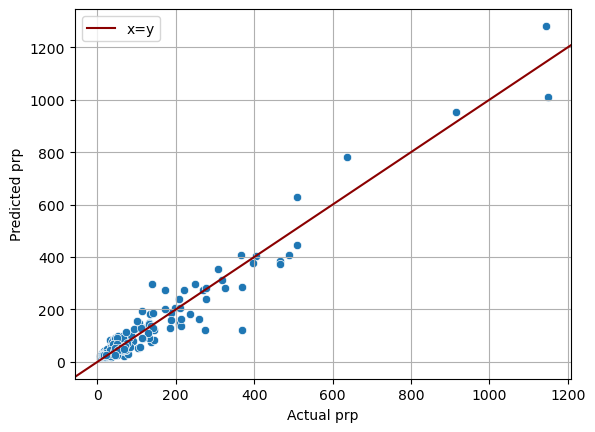

In [53]:
sns.scatterplot(x=y, y = rgr.predict(X))
plt.grid()
plt.xlabel('Actual prp')
plt.ylabel('Predicted prp')
plt.axline((0, 0), slope=1, color='darkred', label='x=y')
plt.legend()

8. Repeat steps 2-7 using a different pair of predictor variables.

9. Repeat steps 2-7 using all predictor variables.  Which predictors appear to be most important?